# Credits to the original kernel: https://www.kaggle.com/triplex/more-unique-values-in-train-set-than-test-set

In [11]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

pd.set_option('max_columns', None)

train = pd.read_csv('../input/santander-customer-transaction-prediction/train.csv')
test = pd.read_csv('../input/santander-customer-transaction-prediction/test.csv')
synthetic = np.load('../input/list-of-fake-samples-and-public-private-lb-split/synthetic_samples_indexes.npy')
train = train.sample(frac=0.5)
test_real = test.iloc[~test.index.isin(synthetic)]
test_fake = test.iloc[test.index.isin(synthetic)]
data = pd.concat([train, test_real, test_fake], axis=0, sort=False)

print(len(train))
print(len(test_real))
print(len(test_fake))

100000
100000
100000


In [12]:
# === unique value
col_var = train.columns[2:]
df = pd.DataFrame(col_var, columns=['feature'])
df['n_train_unique'] = train[col_var].nunique(axis=0).values
df['n_test_real_unique'] = test_real[col_var].nunique(axis=0).values
df['n_test_fake_unique'] = test_fake[col_var].nunique(axis=0).values

for i in df.index:
    col = df.loc[i, 'feature']
    df.loc[i, 'n_overlap_withreal'] = int(np.isin(train[col].unique(), test_real[col]).sum())

df['value_range'] = data[col_var].max(axis=0).values - data[col_var].min(axis=0).values

In [13]:
df.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
feature,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
n_train_unique,65557,71585,62056,56316,50213,83250,33276,69665,67488,41542,79044,79392,9118,74006,58845,18348,61775,82214,82591,84114,78719,82876,63911,22587,70246,13678,78299,48437,31179,62764,85042,57407,61769,72946,23001,76955,66209,58655,74308,73181,83552,80378,28167,14226,78670,92065,65114,87490,86530,82967,28404,84087,76225,29648,84450,78817,69366,31326,73330,32975,73721,89001,55891,66989,47523,71285,40047,81876,428,72309,86960,12642,72178,83767,89391,79246,82465,71009,55111,44043,81383,57975,84568,84304,80846,71507,83065,77832,61390,69618,88380,7549,72344,23579,63361,26161,85671,88774,29257,53115,86450,76883,85078,8828,54757,33384,54125,82107,8197,72894,70489,39074,48654,74738,36620,61796,50152,90631,84031,73049,88547,50925,76434,79479,64066,14742,29184,66454,67549,73572,32081,19735,46781,17461,80135,83082,88153,84228,75043,81941,76625,80971,79043,65613,34959,71575,60538,82006,9966,85719,60874,72025,66368,55978,75695,78537,35376,78049,84340,73252,88247,10512,46201,77000,76953,75488,16719,83201,66645,16834,73265,78194,83923,78842,81164,64878,83722,61859,84444,63422,77281,45361,85789,75047,84415,76391,67322,88320,71625,36118,73902,65318,46972,72325,66851,46363,78086,34730,65367,85780
n_test_real_unique,65580,71661,61865,56507,49995,83228,33273,69487,67521,41583,79221,79749,9121,74037,58951,18253,61906,82518,82682,84370,78645,82738,63855,22619,70202,13728,78260,48428,31321,62618,84985,57146,61890,73157,22954,76756,66309,58742,74294,73292,83405,80327,28163,14288,78457,92058,65189,87427,86929,82973,28412,83881,76266,29631,84548,79114,69316,31286,73482,32888,73575,88874,55891,66913,47632,71421,40071,81931,428,72217,86863,12604,72162,83685,89343,79183,82703,71025,54942,44041,81543,58200,84426,84275,80933,71490,82894,77815,61261,69297,88329,7569,72603,23637,63414,26068,85505,88491,

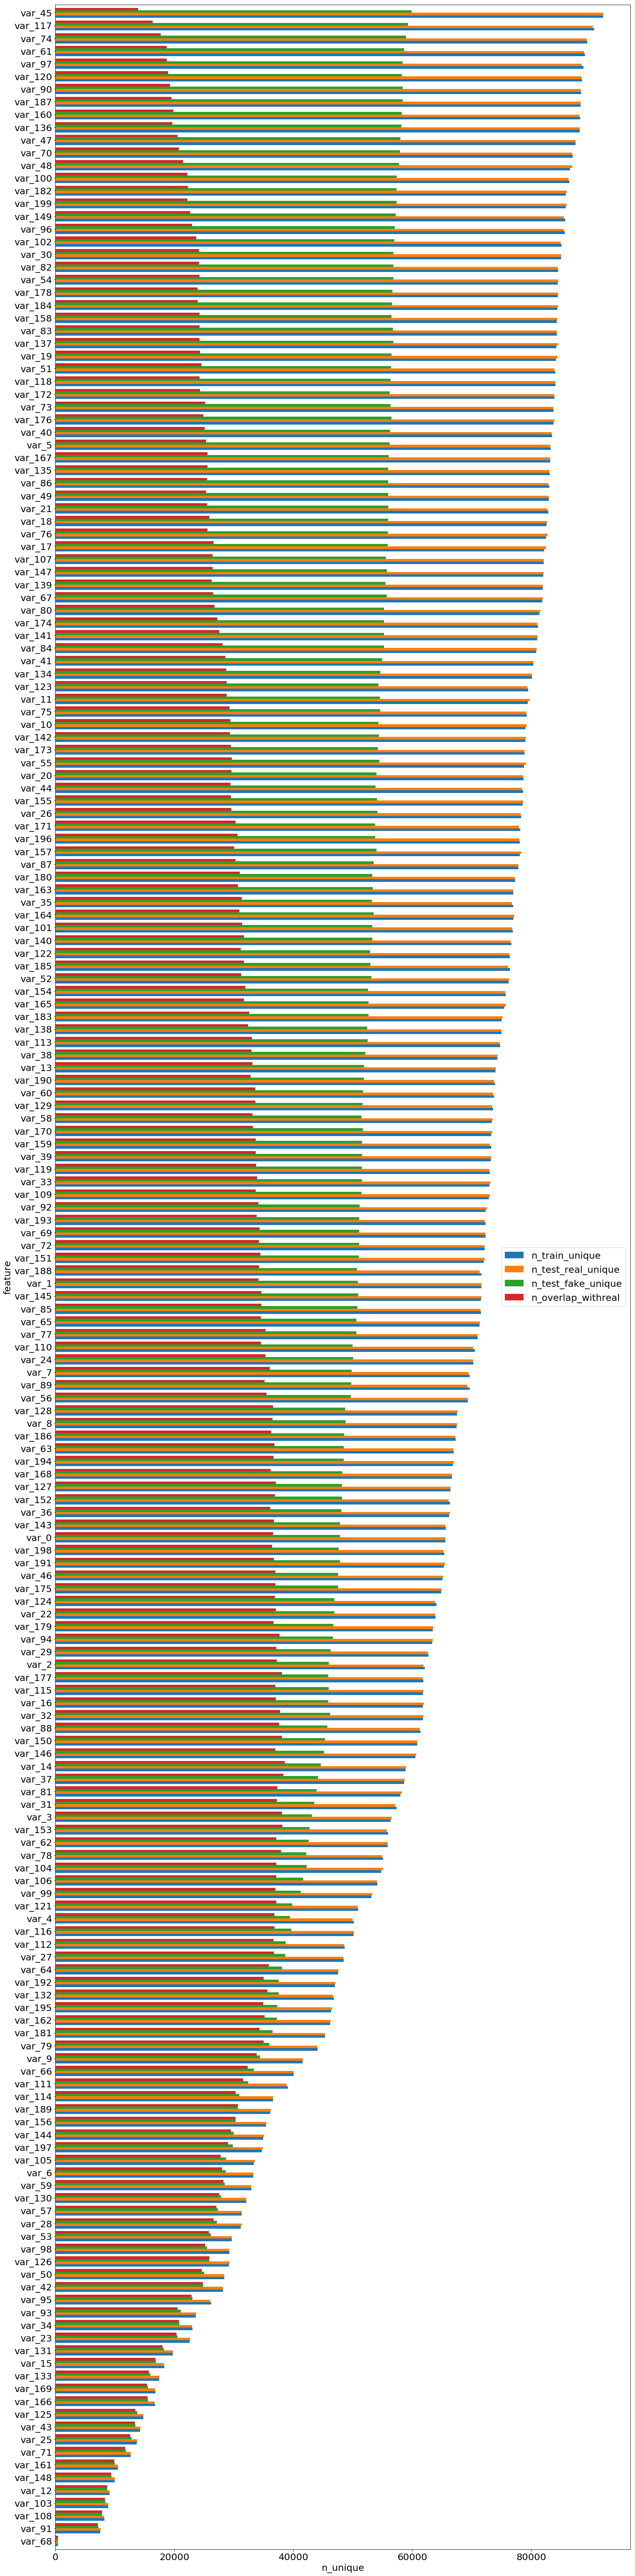

In [15]:
# === plot
df = df.sort_values(by='n_train_unique').reset_index(drop=True)
df[['n_train_unique', 'n_test_real_unique', 'n_test_fake_unique', 'n_overlap_withreal']].plot(kind='barh' ,figsize=(22, 100), fontsize=20, width=0.8)
plt.yticks(df.index, df['feature'].values)
plt.xlabel('n_unique', fontsize=20)
plt.ylabel('feature', fontsize=20)
plt.legend(loc='center right', fontsize=20)